<a href="https://colab.research.google.com/github/tigureis/Analyzing-International-Customer-Behavior-with-E-commerce-Data-and-Python/blob/main/Analyzing_International_Customer_Behavior_with_E_commerce_Data_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Ydata-Profiling

In [1]:
!pip install ydata-profiling

Import Libraries

In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn import set_config

Import the DF

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tigureis/pratica5/refs/heads/main/data.csv',encoding='latin-1')
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Use [`ProfileReport`](https://docs.profiling.ydata.ai/latest/) from *ydata_profiling* to analize the data

In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Missing values in customer identification

---

Check the DataFrame for the missing CustomID

In [7]:
print(f'There is a total of {df["CustomerID"].isna().sum()} entrys with missing CustomerID\n')
df[df['CustomerID'].isna()]

There is a total of 135080 entrys with missing CustomerID



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


Droping the missing values

In [8]:
df=df.dropna(subset=['CustomerID'])
print(f'There is a total of {df["CustomerID"].isna().sum()} entrys with missing CustomerID\n')

There is a total of 0 entrys with missing CustomerID



# Unit prices and quantity of products equal to or less than 0

---



Check the DataFrame for data with negative prices

In [9]:
print(f"Number of rows with Price <= 0: {df[df['UnitPrice'] <= 0]['UnitPrice'].count()}\n")
df[df['UnitPrice'] <= 0]

Number of rows with Price <= 0: 40



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


Drop the identified rows and check the results

In [10]:
df = df.drop(df[df['UnitPrice'] <= 0].index)
print(f"Number of rows with Price <= 0: {df[df['UnitPrice'] <= 0]['UnitPrice'].count()}\n")

Number of rows with Price <= 0: 0



Check the DataFrame for data with negative 'Quantity'

In [11]:
print(f"Number of rows with Quantity <= 0: {df[df['Quantity'] <= 0]['Quantity'].count()}\n")
df[df['Quantity'] <= 0]

Number of rows with Quantity <= 0: 8905



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Drop the identified rows and check the results

In [12]:
df = df.drop(df[df['Quantity'] <= 0].index)
print(f"Number of rows with Quantity <= 0: {df[df['Quantity'] <= 0]['Quantity'].count()}\n")

Number of rows with Quantity <= 0: 0



# Check if there are duplicate rows

---



Check the DataFrame for duplicated Rows

In [13]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}\n")
display(df[duplicates])

Number of duplicate rows: 5192



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


Drop the duplicated rows and check the results

In [14]:
df=df.drop_duplicates()
print(f"Number of duplicate rows: {df.duplicated().sum()}\n")

Number of duplicate rows: 0



# Column data types

---



Verify the column types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


 Modifying the data type

In [16]:
df['CustomerID'] = df['CustomerID'].astype('int')
df['InvoiceNo'] = df['InvoiceNo'].astype('int')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

check the results

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int64         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB


# Handling outliers

---



Use boxplot to check for outliers

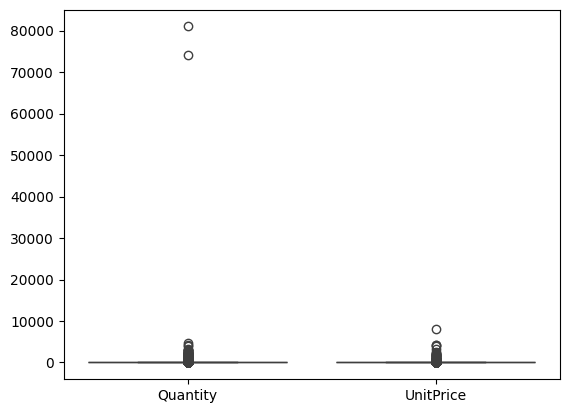

In [18]:
sns.boxplot(df[['Quantity', 'UnitPrice']]);

remove the extreme outliers where the item quantity in the purchase is greater than 10,000, and the unit price is greater than 5,000

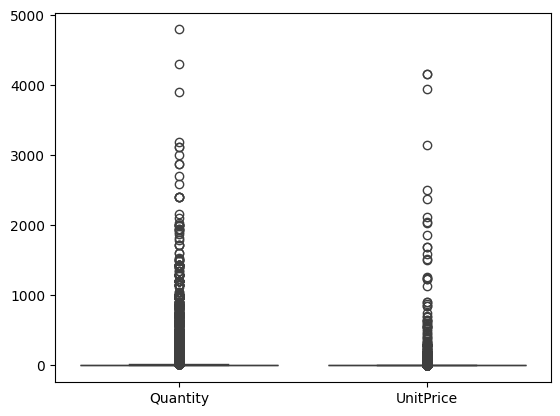

In [19]:
df = df.drop(df[df['Quantity'] >= 10000].index)
df = df.drop(df[df['UnitPrice'] >= 5000].index)
sns.boxplot(df[['Quantity', 'UnitPrice']]);

# Add a new column

---



Calculate the UnitPrice and add to the DF

In [20]:
df['Purchase_Price'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Latest date

---



Use the .max() function to find the date of the last sale

In [21]:
#df[df['InvoiceDate'] == df['InvoiceDate'].max()]
last_date=df['InvoiceDate'].max()
print(f'The latest date is {last_date}')

The latest date is 2011-12-09 12:50:00


# Plotting graphs

---


Create a DataFrame only with data from the top 10 countries

In [22]:
sorted(df['Country'].unique()) #check for misspelled countries
df[df['Country'] == 'Unspecified'] #check for unspecified countries

top10Country = (df.groupby(
    ['Country'],
    observed=False)
    .Purchase_Price.sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
top10Country

,Country,Purchase_Price
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


plot a bar graph this data

Text(0.5, 1.0, 'Sales by Country')

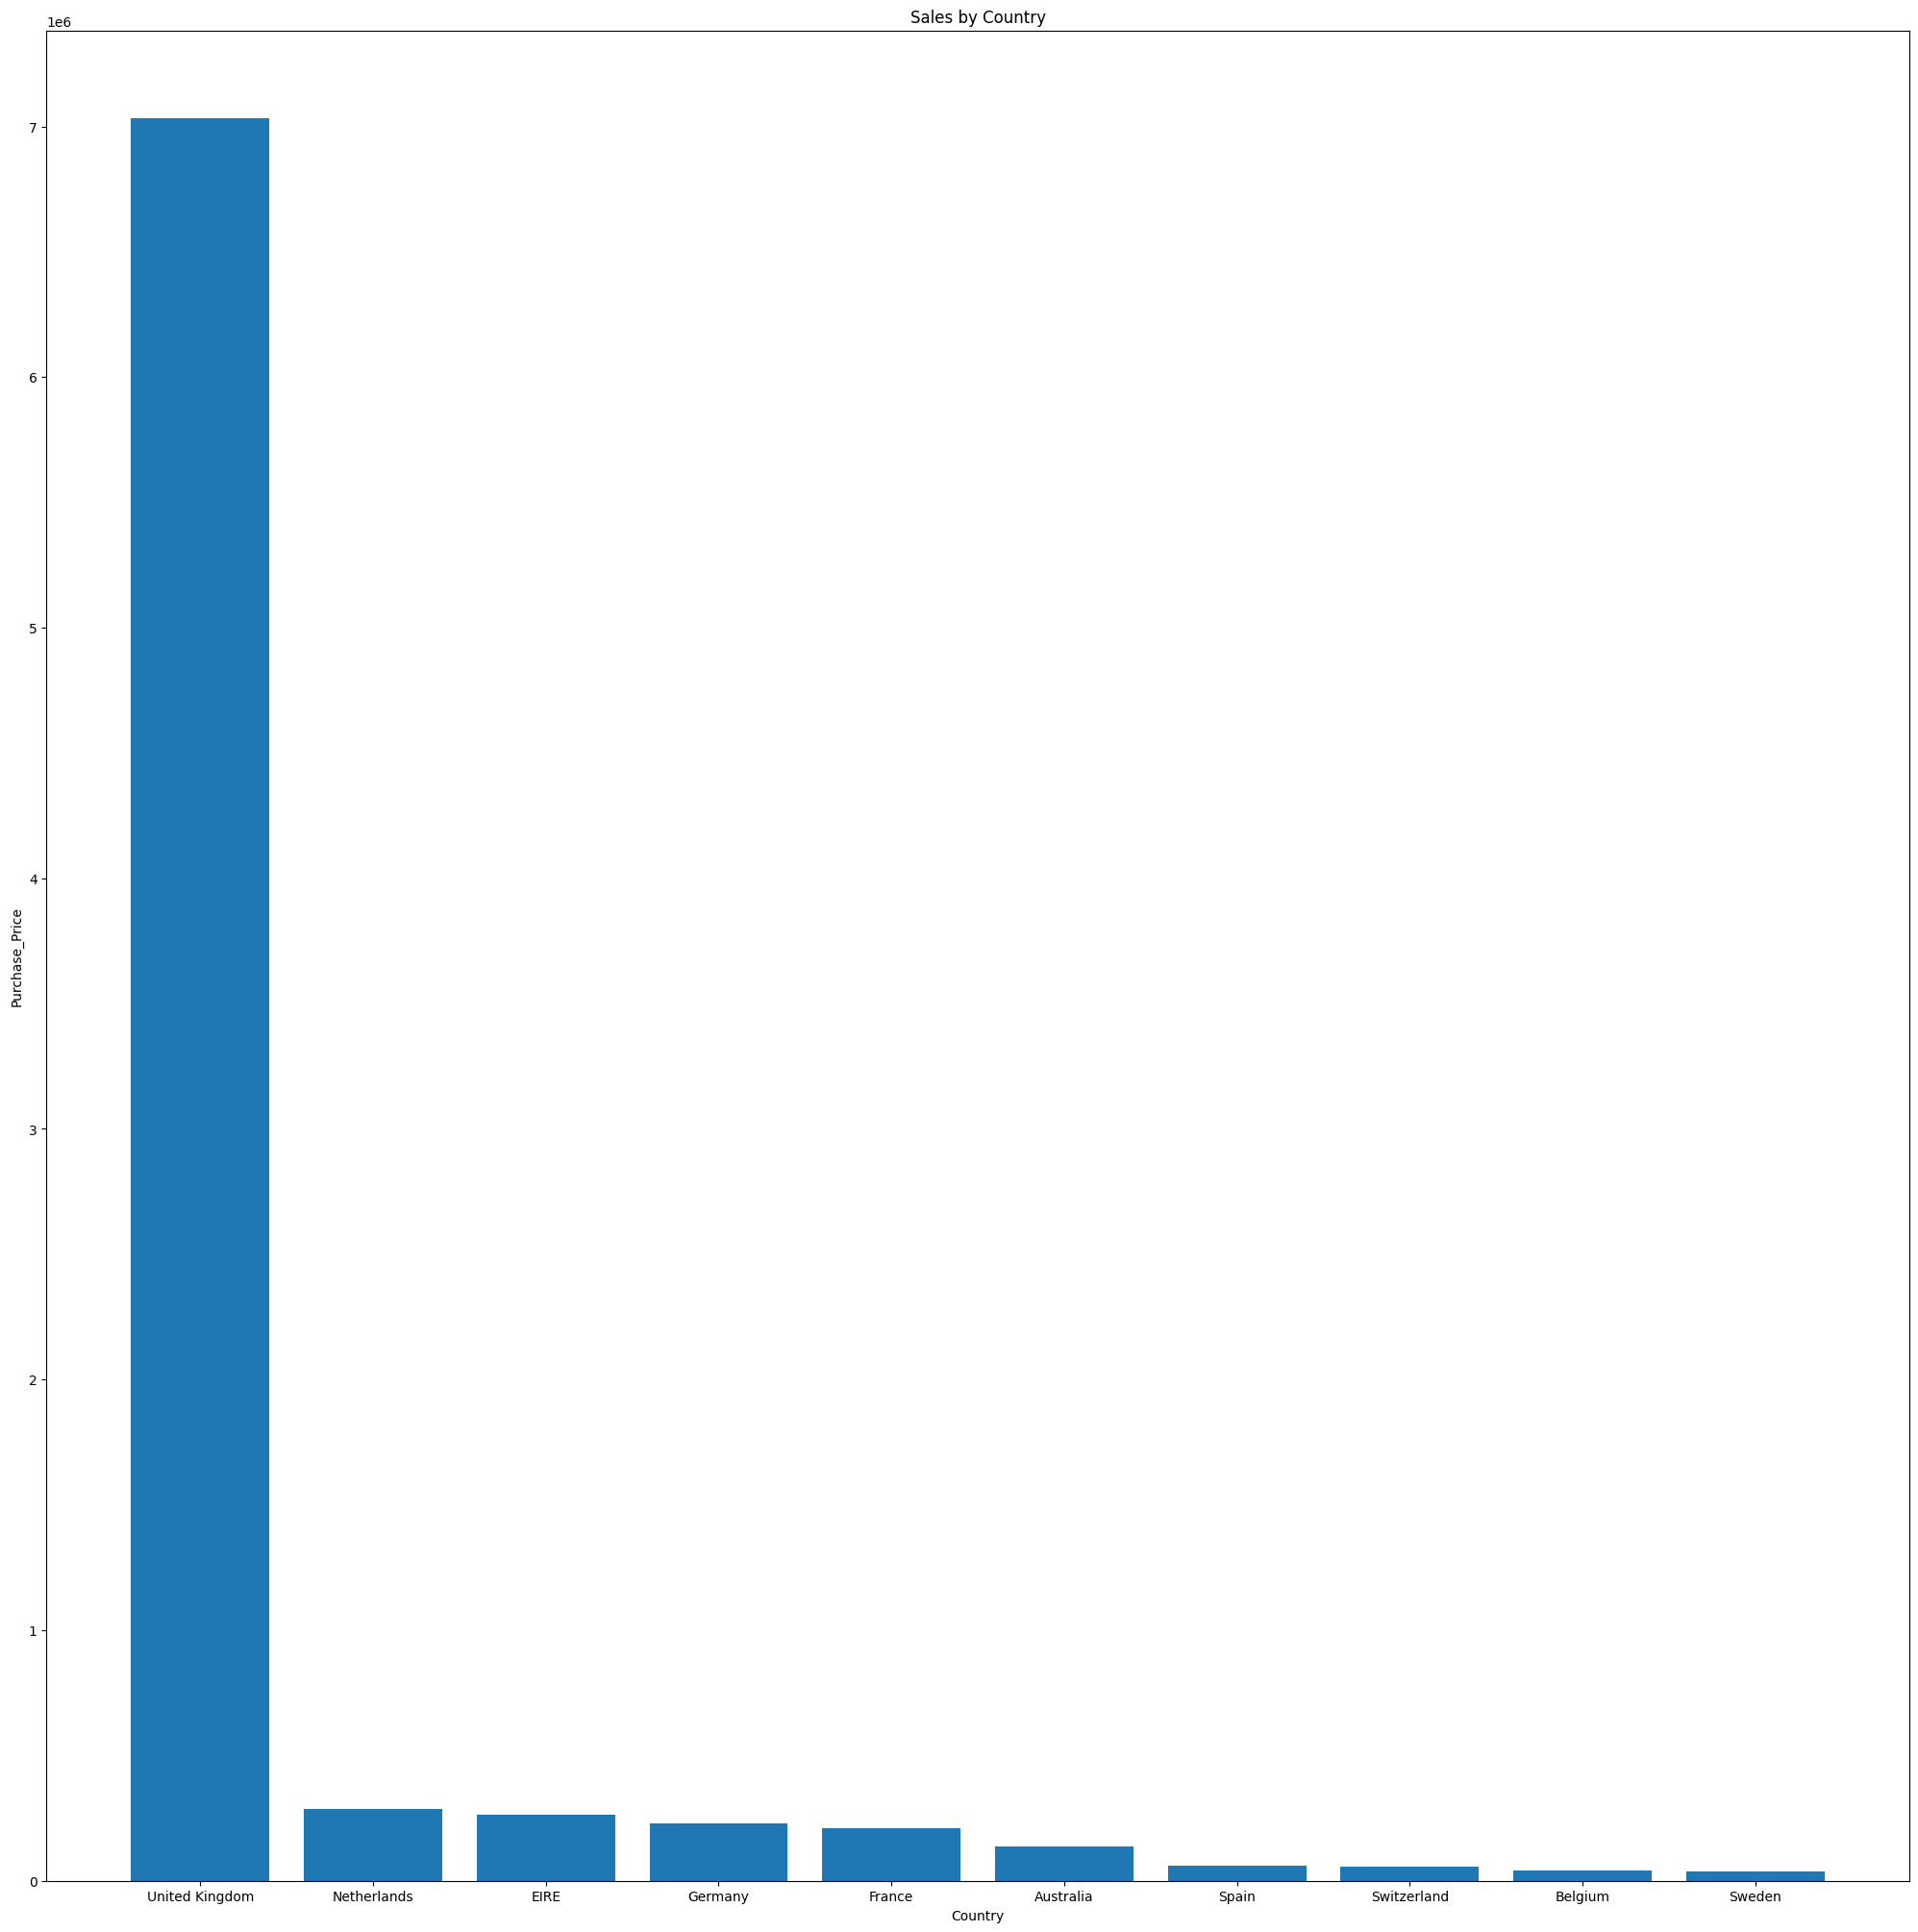

In [23]:
fig=plt.figure(figsize=(25,25))
plt.bar(top10Country['Country'], top10Country['Purchase_Price'])
plt.xlabel("Country")
plt.ylabel("Purchase_Price")
plt.title("Sales by Country")


The quantity of sales in England makes it difficult to visualize the other sales, therefore plot the sales of the other countries separately.

Text(0.5, 1.0, 'Sales by Country')

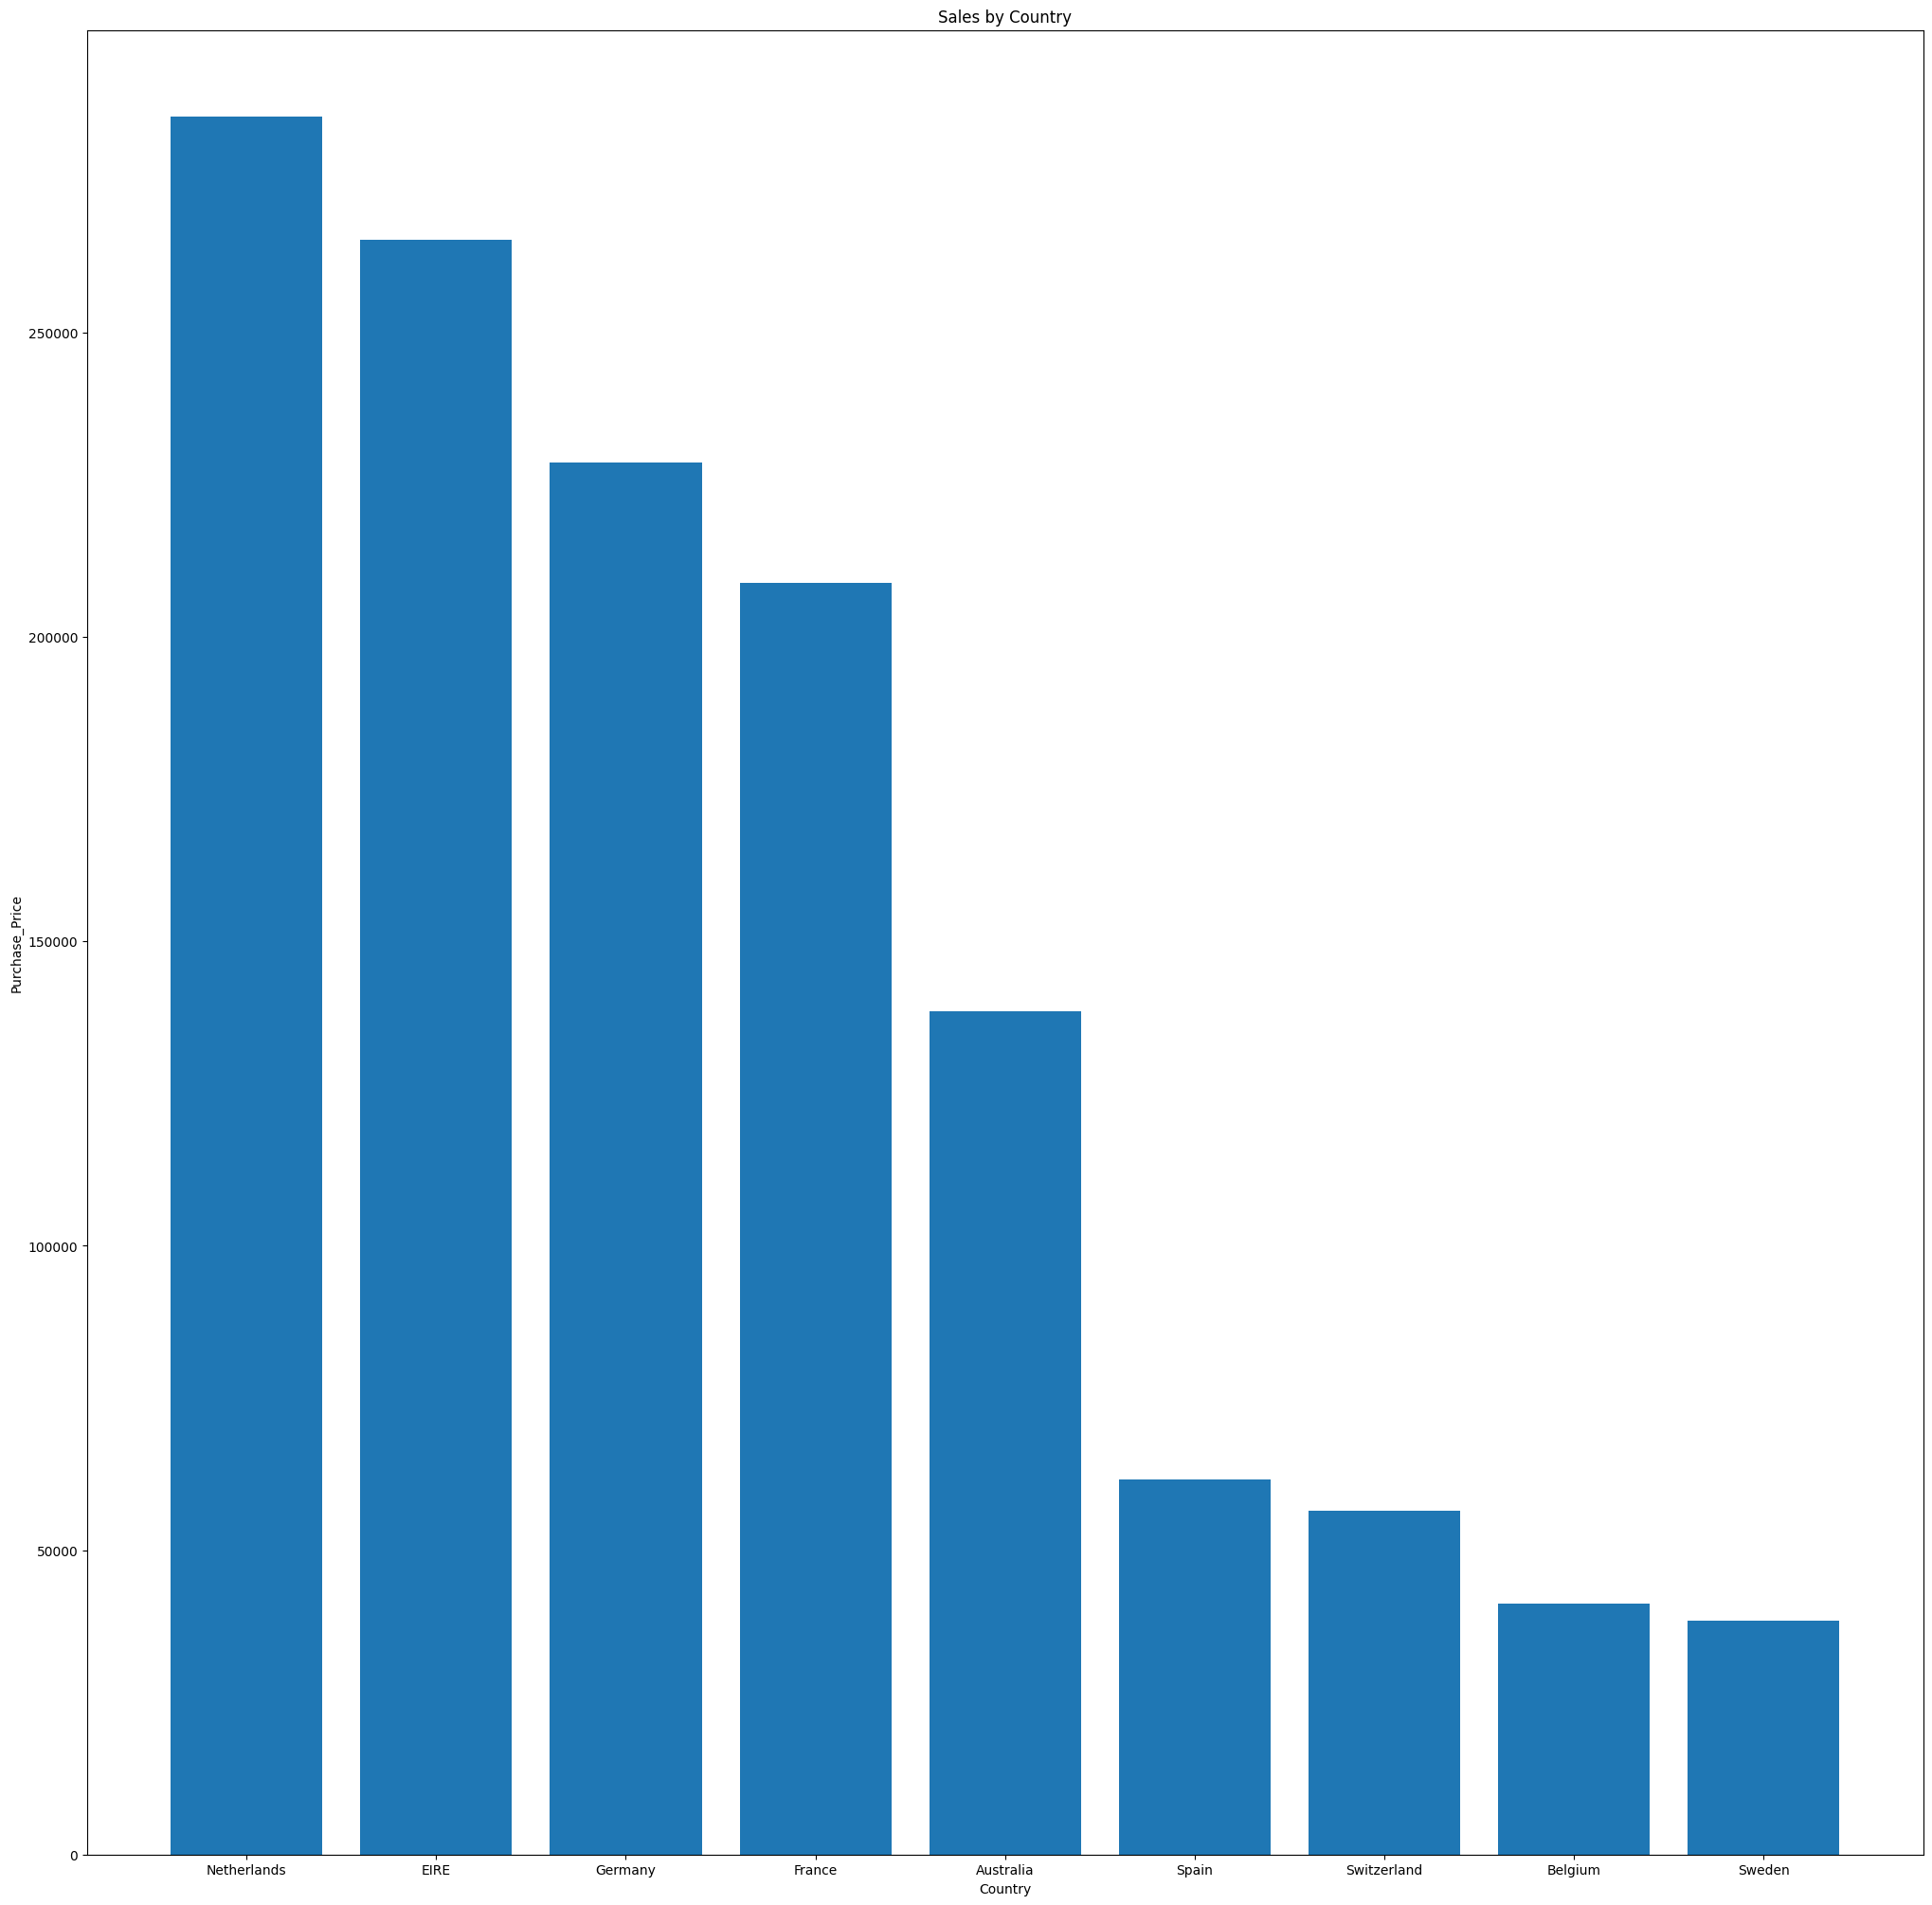

In [24]:
top9Country = top10Country[top10Country['Country'] != 'United Kingdom']
top9Country


fig=plt.figure(figsize=(25,25))
plt.bar(top9Country['Country'], top9Country['Purchase_Price'])
plt.xlabel("Country")
plt.ylabel("Purchase_Price")
plt.title("Sales by Country")

Check the products for misspelled ones

In [25]:
sorted(df['Description'].unique()) #check for misspelled Products
df['Description'] = df['Description'].str.lstrip()

Create a DataFrame only with data from the top 10 products

Text(0.5, 1.0, 'Sales by Product')

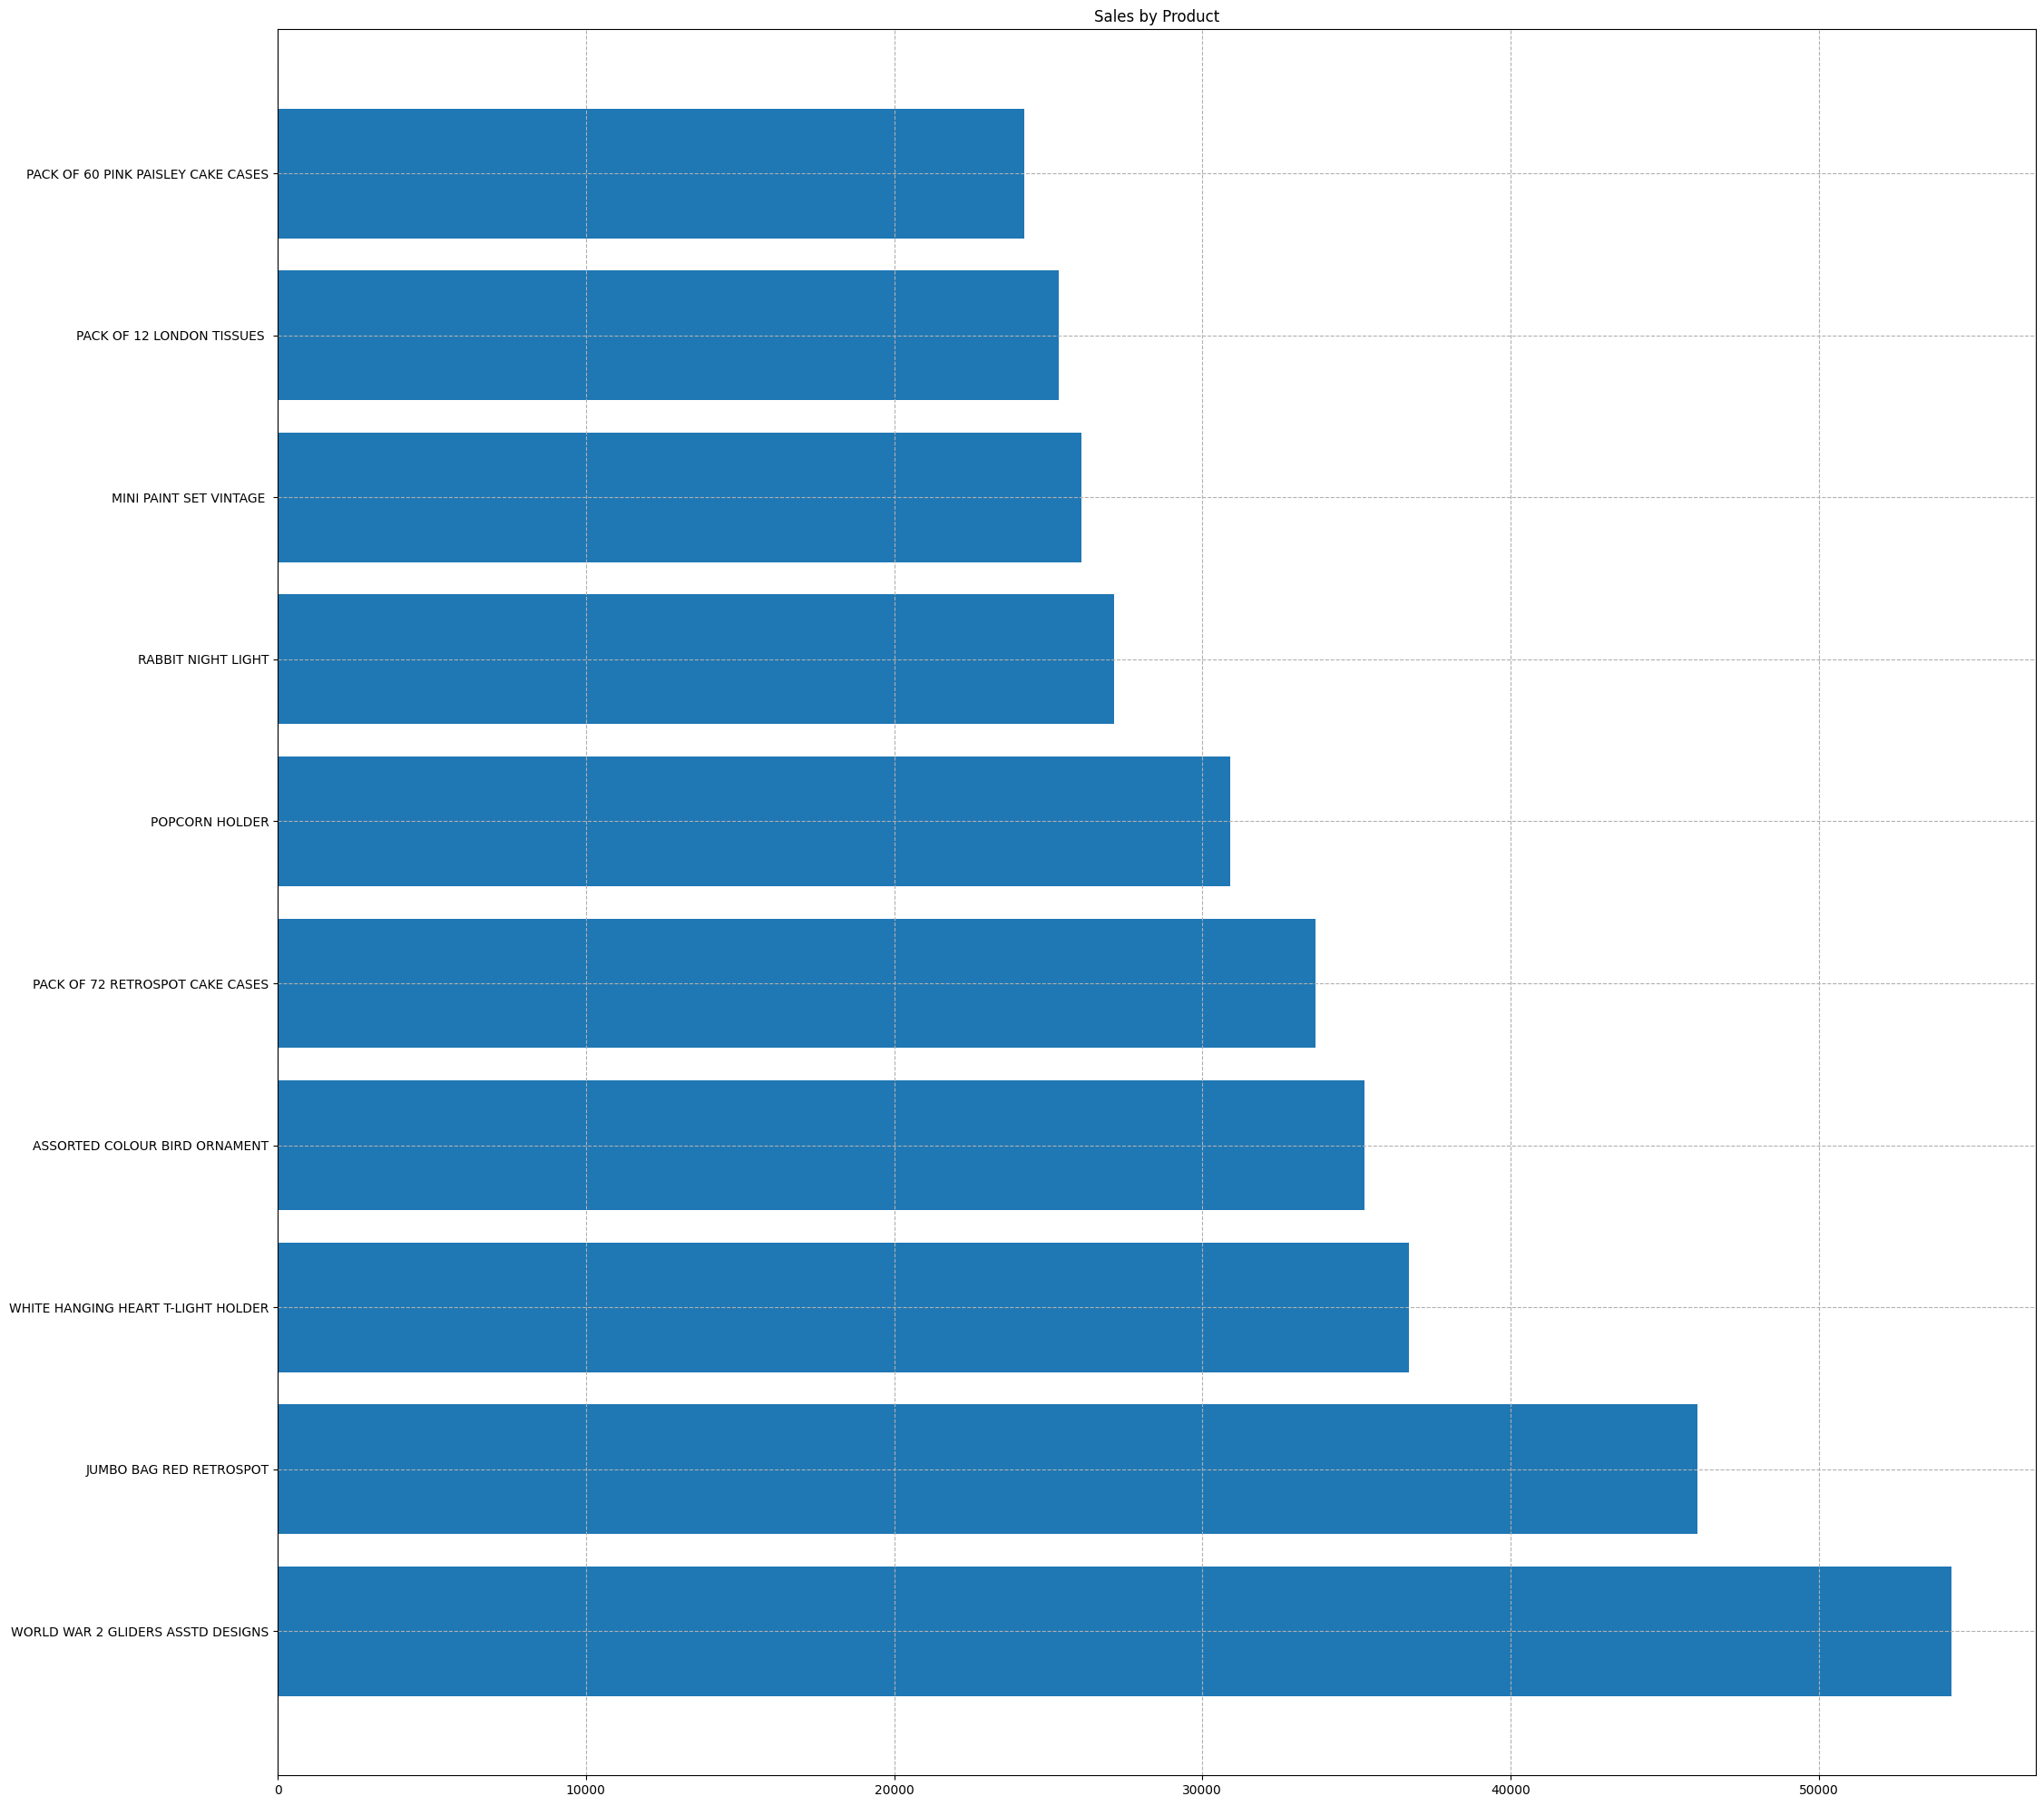

In [26]:
top10Products = (df.groupby(
    ['Description'],
    observed=False)
    .Quantity.sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()

)
figsize=(25,25)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plt.barh(top10Products['Description'], top10Products['Quantity'])

#plt.xlabel("Description")
#plt.ylabel("Quantity")
ax.grid(True, linestyle='--', zorder=0)
plt.title("Sales by Product")

Add a column to the DataFrame with the isolated month and year data

In [27]:
df['Date']=df['InvoiceDate'].dt.strftime('%Y-%m')
df['Date']

,Date
0,2010-12
1,2010-12
2,2010-12
3,2010-12
4,2010-12
...,...
541904,2011-12
541905,2011-12
541906,2011-12
541907,2011-12


Create a DataFrame with data aggregated by date

In [28]:
agg_Date=df.groupby('Date').Purchase_Price.sum().reset_index()
agg_Date

,Date,Purchase_Price
0,2010-12,570422.730
1,2011-01,490917.710
2,2011-02,446084.920
3,2011-03,594081.760
4,2011-04,468374.331
5,2011-05,669212.400
6,2011-06,660046.050
7,2011-07,598962.901
8,2011-08,644051.040
9,2011-09,950690.202


plot a bar graph this data

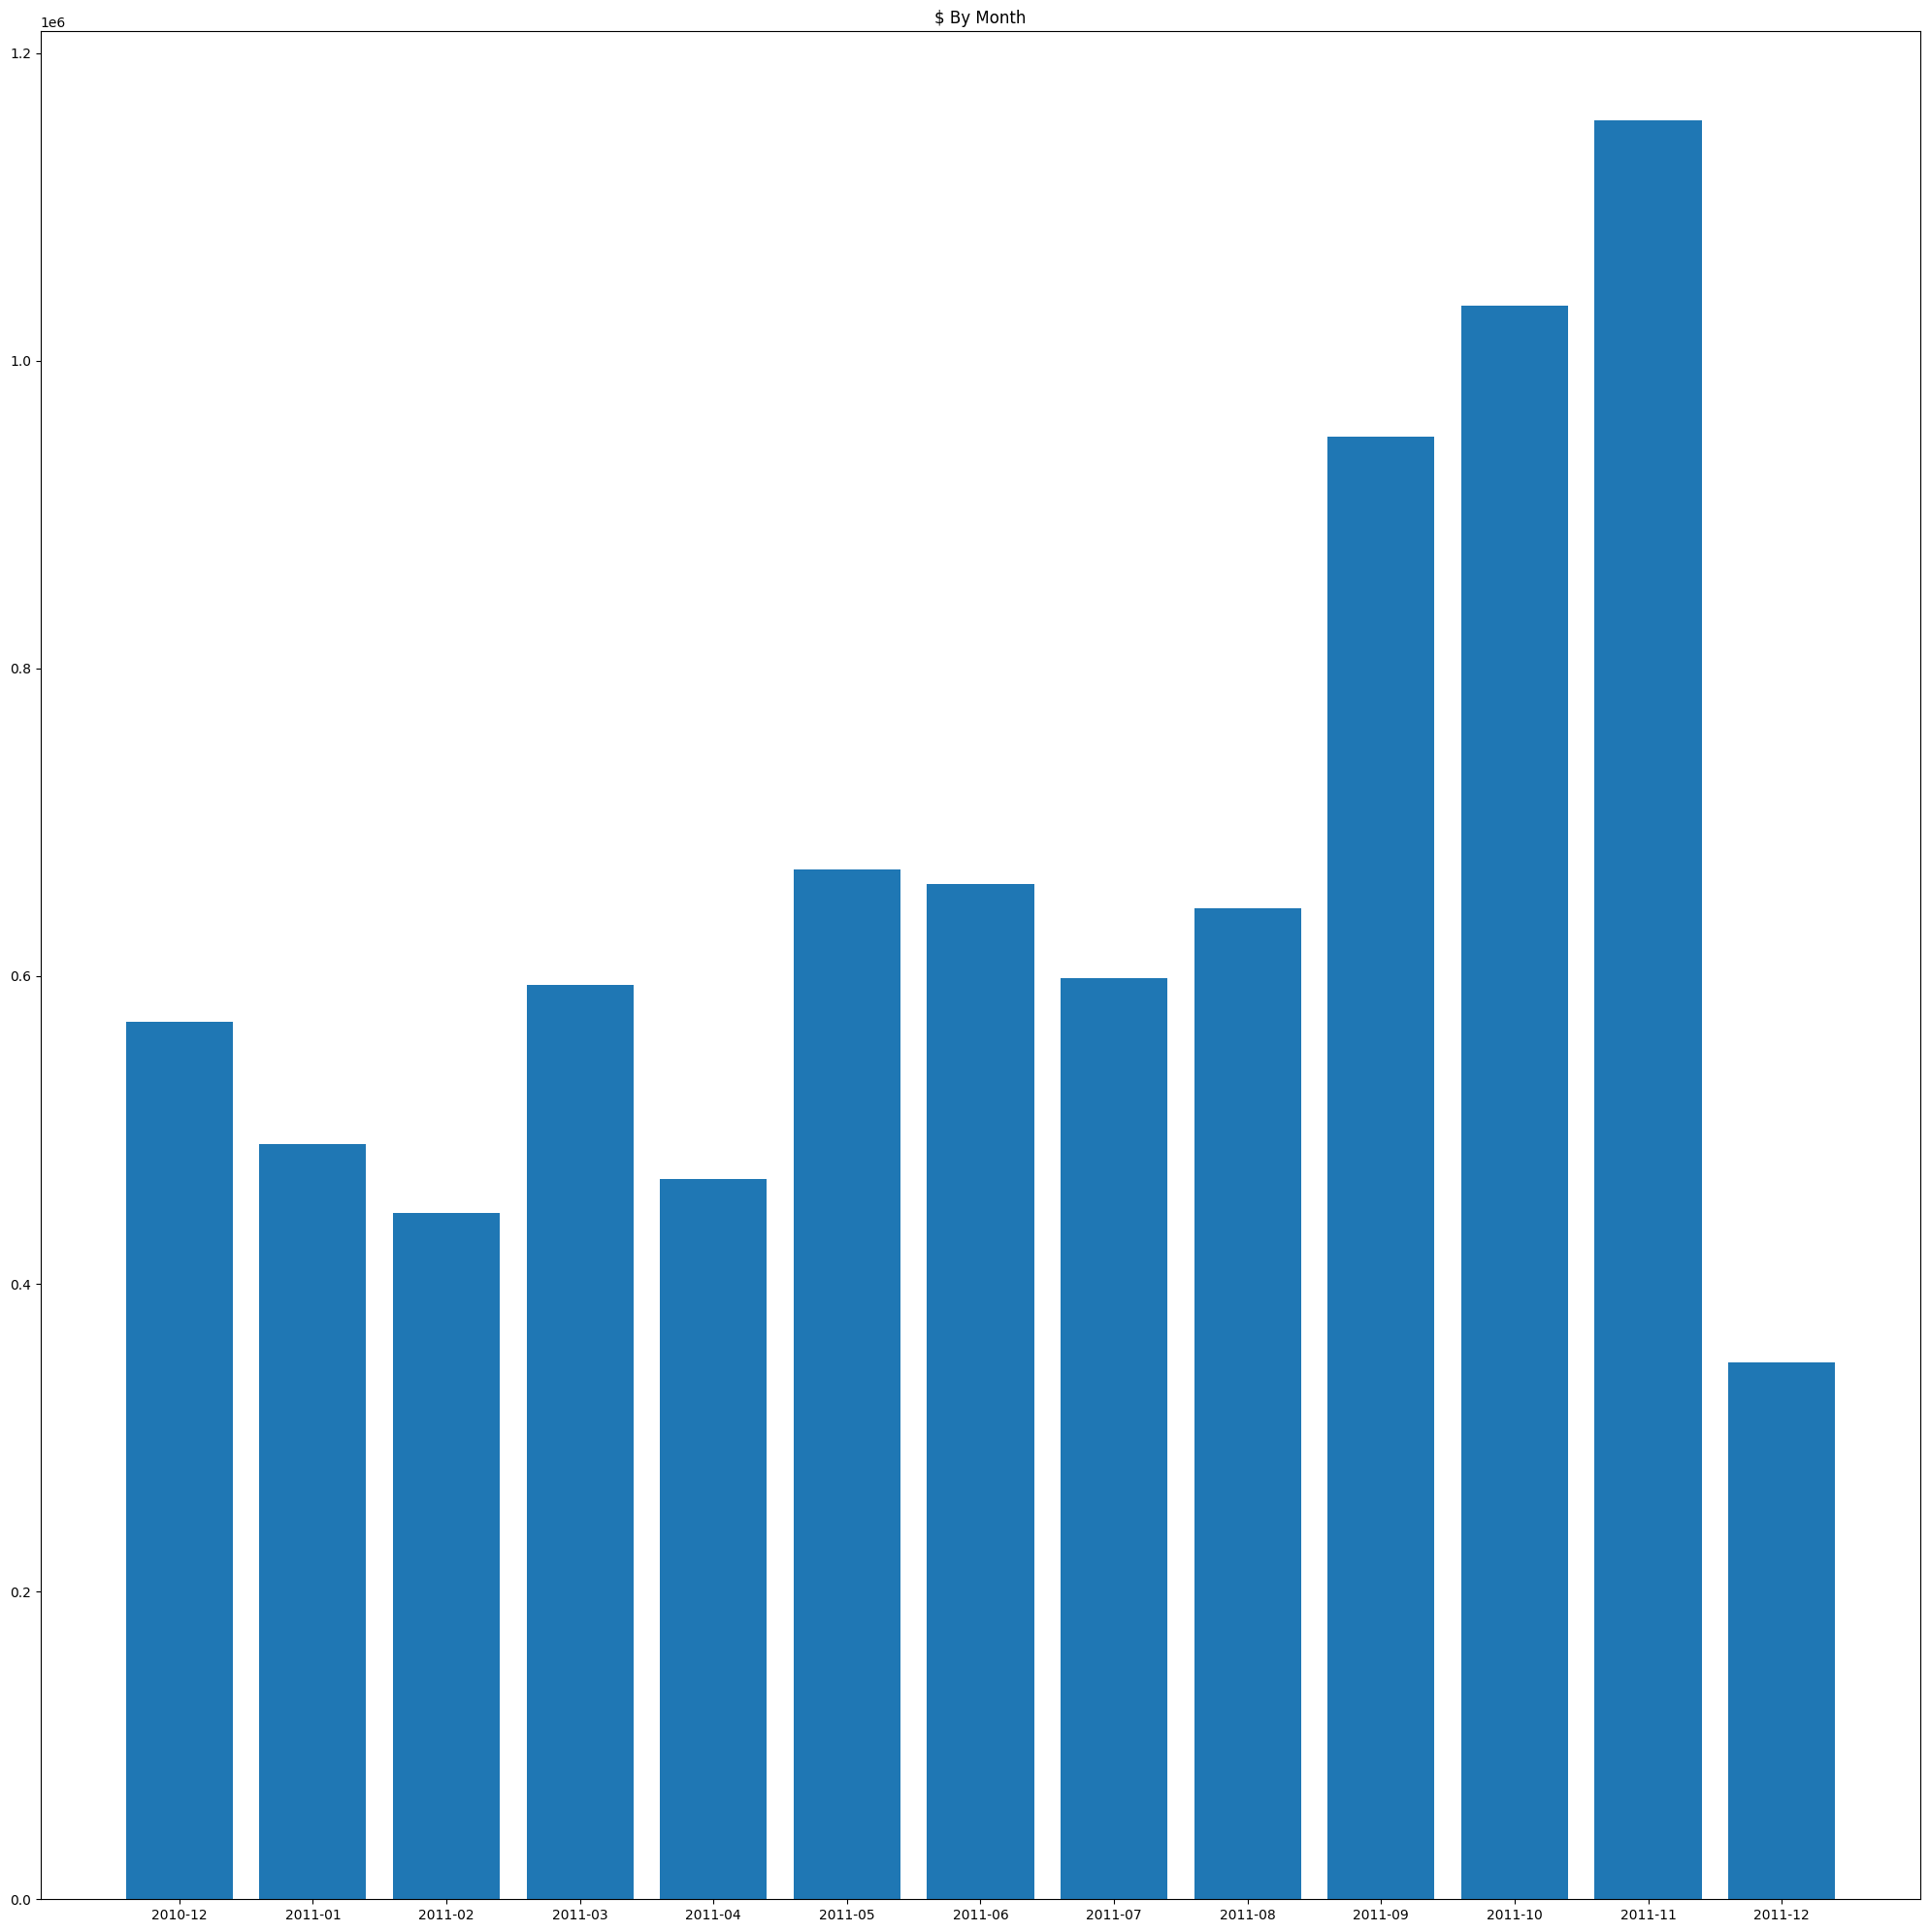

In [37]:
figsize=(25,25)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
plt.bar(agg_Date['Date'], agg_Date['Purchase_Price'])
plt.title("$ By Month");

Create a DataFrame with data aggregated by date only from the top 10 Country

In [30]:
agg_Date_Country=df.copy()
agg_Date_Country=agg_Date_Country[agg_Date_Country['Country'].isin(top10Country['Country'])]
agg_Date_Country=agg_Date_Country.groupby(['Date','Country']).Purchase_Price.sum().reset_index()

plot a bar graph this data

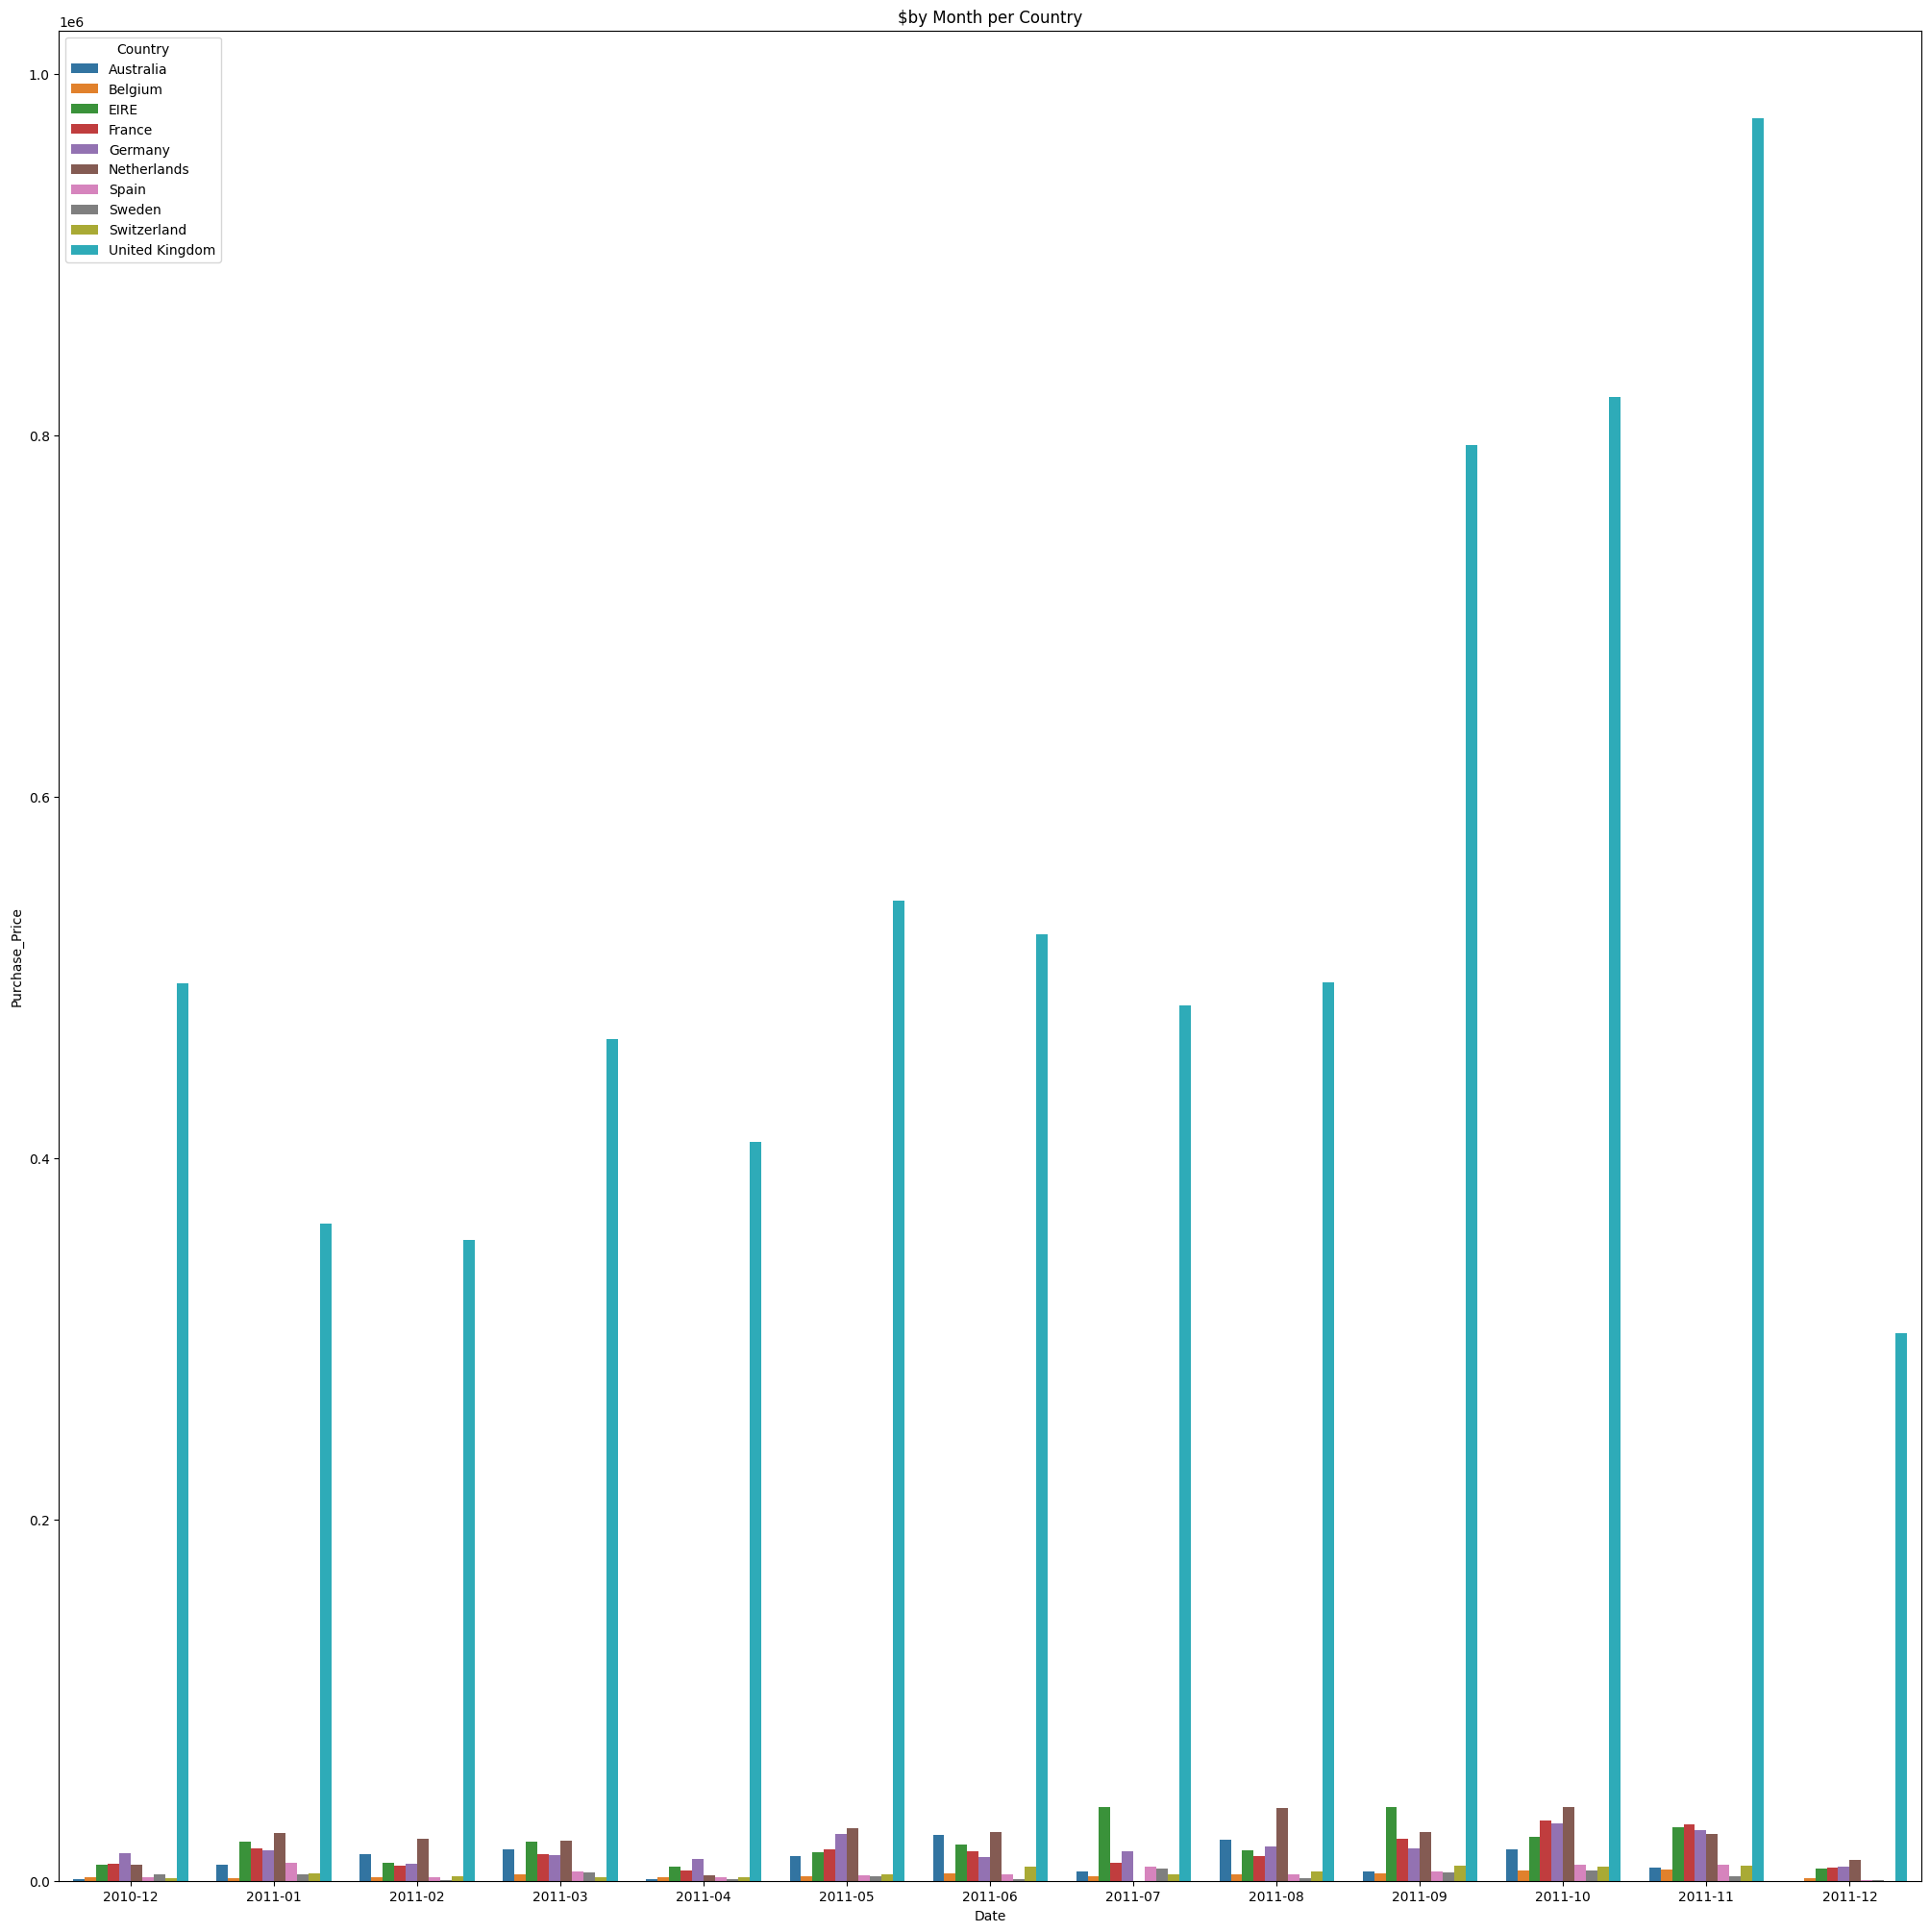

In [36]:
fig = plt.subplots(figsize=(25,25))
sns.barplot(x='Date', y='Purchase_Price', hue='Country', data=agg_Date_Country);
plt.title("$by Month per Country");

# RFM Calculation

---



Create a new DF grouped by the Customer ID amd use agg to calculate the RFM

In [32]:
RMF = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,
    'InvoiceNo': lambda x: len(x.unique()),
    'Purchase_Price': lambda x: x.sum()
}).sort_values('CustomerID')
RMF.rename(columns={'InvoiceDate': 'R','InvoiceNo': 'F','Purchase_Price': 'M'}, inplace=True)
RMF

,R,F,M
CustomerID,,,
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
12352,35,8,2506.04
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05
